# Can I undetand what a Normal mixture model is and how to use it?


In [1]:
%matplotlib inline
#%matplotlib notebook
%load_ext version_information
%load_ext autoreload


In [21]:
import datetime
import os
import sys
import warnings

warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacepy.datamodel as dm
import spacepy.plot as spp
import spacepy.toolbox as tb
import xarray as xr
import tqdm
import pymc3 as mc3

%version_information matplotlib, numpy, pandas

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.0.0
OS Darwin 15.6.0 x86_64 i386 64bit
matplotlib 2.0.2
numpy 1.12.1
pandas 0.20.1
Wed May 24 16:42:56 2017 MDT

In [3]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = plt.rcParams['figure.dpi'] # 72
%config InlineBackend.figure_format = 'retina'

In [15]:
# Lets make to Normal distributions and add them together
locs = np.asarray([3,10])
sds = np.asarray([2,2])
D1 = np.random.normal(locs[0], sds[0], size=10000)
D2 = np.random.normal(locs[1], sds[1], size=10000)

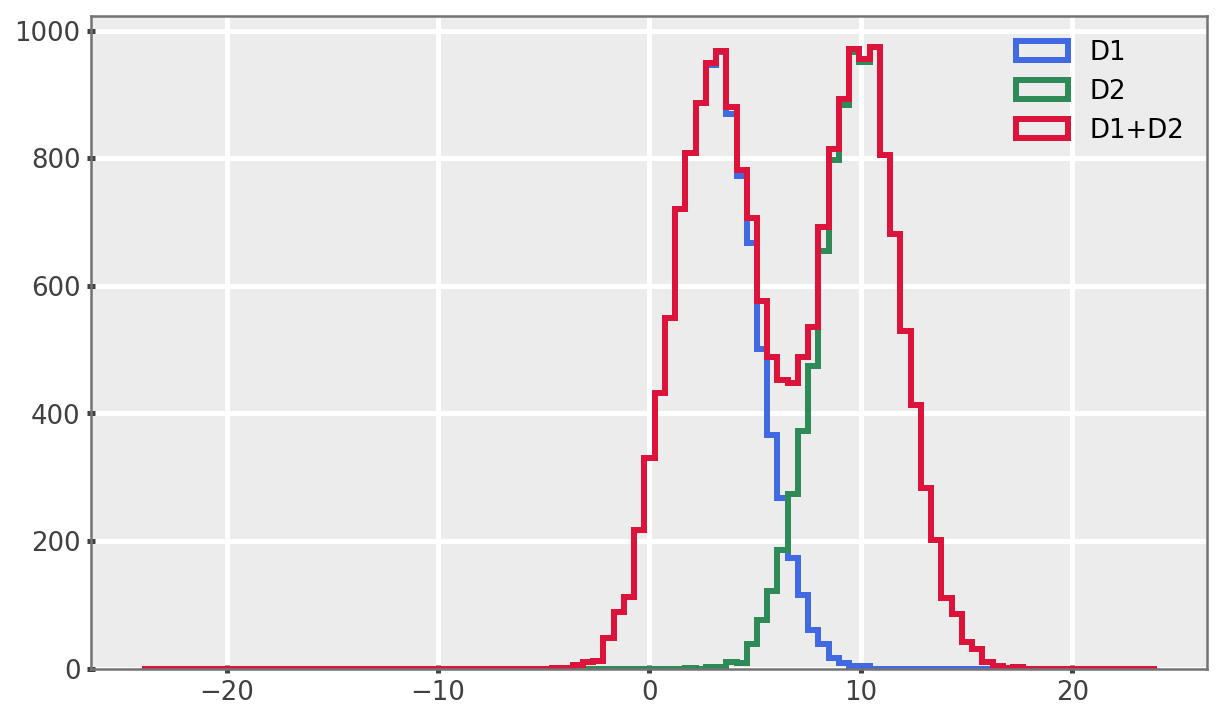

In [20]:
bins = np.linspace(-24,24, 100)
plt.hist(D1, bins=bins, histtype='step', lw=3, label='D1')
plt.hist(D2, bins=bins, histtype='step', lw=3, label='D2')

plt.hist(np.append(D1,D2), bins=bins, histtype='step', lw=3, label='D1+D2')
plt.legend()

(20000,)


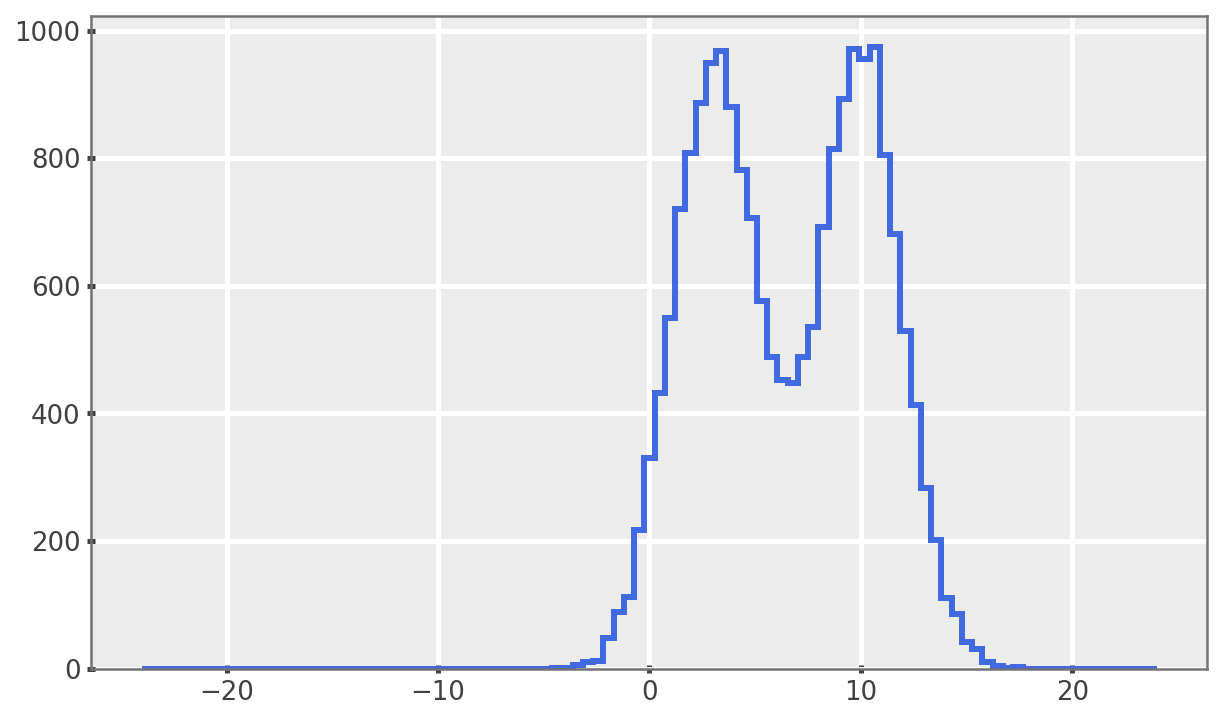

In [36]:
D = np.append(D1,D2)
print(D.shape)
plt.hist(D, bins=bins, histtype='step', lw=3, label='D1+D2');


In [ ]:
with mc3.Model() as model:
    weights = mc3.Uniform('weights', 0,1 , shape=2)
    loc1_mc = mc3.Uniform('loc1_mc', -10,20)
    loc2_mc = mc3.Uniform('loc2_mc', loc1_mc,20)
    sds_mc = mc3.Uniform('sds_mc', 0, 10) # we know they are the same for round 1
    obs = mc3.NormalMixture('obs', w=weights, mu=[loc1_mc, loc2_mc], sd=sds_mc, observed=D, shape=2)
    start = mc3.find_MAP()
    trace = mc3.sample(20000, start=start)
    
mc3.traceplot(trace);
mc3.summary(trace)


In [ ]:
ppc = mc3.sample_ppc(trace, model=model, samples=500)
ppc.keys()

In [ ]:
plt.hist(ppc['obs'], bins=bins)